In [3]:
#resample the GiveMeSomeCredit dataset 
import pandas as pd

df_train = pd.read_csv(
    "https://raw.githubusercontent.com/dlawrences/GlobalAINightBucharest/master/data/cs-training.csv",
    header='infer').dropna()

df_train.head(10)

,Idx,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
10,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
11,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


In [4]:
# Class count
count_class_0, count_class_1 = df_train.SeriousDlqin2yrs.value_counts()

# Divide by class
df_class_0 = df_train[df_train['SeriousDlqin2yrs'] == 0]
df_class_1 = df_train[df_train['SeriousDlqin2yrs'] == 1]

Random under-sampling:
1    8357
0    8357
Name: SeriousDlqin2yrs, dtype: int64


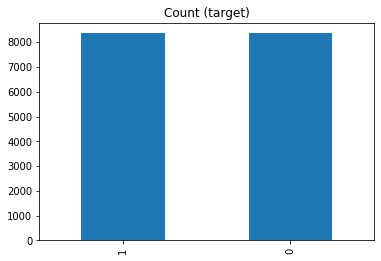

In [22]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0).sample(frac=1).reset_index(drop=True).drop('Idx', axis=1)

print('Random under-sampling:')
print(df_test_under.SeriousDlqin2yrs.value_counts())

df_test_under.SeriousDlqin2yrs.value_counts().plot(kind='bar', title='Count (target)');


In [23]:
df_test_under.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.010493,79,0,0.005852,3075.0,7,0,0,0,0.0
1,0,0.880330,43,0,1.163256,2100.0,6,0,0,0,3.0
2,1,0.132325,76,0,0.150979,10166.0,8,0,2,1,0.0
3,1,1.108420,48,0,0.165220,2880.0,4,2,0,2,2.0
4,1,0.917729,55,2,1.130248,3500.0,13,0,1,1,1.0
5,0,1.000000,61,0,0.181652,12600.0,4,0,3,0,1.0
6,0,0.348783,49,0,0.418033,8783.0,12,0,1,0,0.0
7,0,0.091503,27,0,0.119876,9000.0,9,0,0,0,0.0
8,1,0.989609,60,1,0.595626,2148.0,6,0,1,0,0.0
9,0,0.584367,48,0,0.386846,9000.0,14,0,2,0,2.0


In [24]:
df_test_under.to_csv("cs-training-resampled.csv", index = False)